In [24]:
%reload_ext autoreload
%autoreload 2
from sage_cluster_pictures import *
latex.extra_preamble('')
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}")
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True
set_verbose(0)

Make an iso by hand:

In [6]:
  T = BYTree()
  T.add_blue_vertex('v1', 1)
  T.add_blue_vertex('v2', 0)
  T.add_yellow_edge(('v1', 'v2', 2))
  f = lambda v: {'v1':'v2','v2':'v1'}[v]
  eps = lambda c: -1
  F = BYTreeIsomorphism(T, T, f, eps)
  F

BY-tree isomorphism from BY-tree with 0 yellow vertices, 2 blue vertices, 1 yellow edges, 0, blue edges to BY-tree with 0 yellow vertices, 2 blue vertices, 1 yellow edges, 0, blue edges

In [7]:
F('v1')

'v2'

In [8]:
F('v2')

'v1'

In [9]:
F(T.edges()[0])

('v2', 'v1', 2)

Get one from frobenius

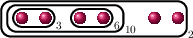

In [50]:
x = polygen(Qp(7))
H = HyperellipticCurve((x^2 + 7^2)*(x^2 - 7^15)*(x - 7^6)*(x - 7^6 - 7^9))
R = Cluster.from_curve(H)
view(R)

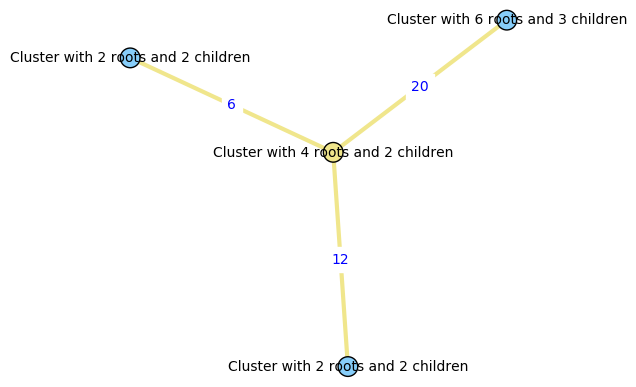

In [51]:
T = R.BY_tree()
plot(T, vertex_labels=True)

In [59]:
phi = C.roots()[0].parent().frobenius_endomorphism()
phi

TypeError: The domain must be unramified

In [52]:
F = BYTreeIsomorphism(T, T, lambda C: C.frobenius(),
                      lambda x: T.yellow_vertices()[0].star().epsilon(lambda t: t.frobenius()))
F(R)

Cluster with 6 roots and 3 children

In [54]:
F(T.yellow_vertices()[0])

Cluster with 4 roots and 2 children

In [55]:
F(T.blue_vertices()[1]) == T.blue_vertices()[1]

True

In [56]:
F.epsilon(T.yellow_edges()[0])

AttributeError: 'sage.rings.padics.relative_ramified_CR.RelativeRamifiedCappedRelativeElement' object has no attribute 'frobenius'

So that was a boring automorphism of the tree, even though frob acts nontrivially on the cluster (what are signs?)

In [60]:
set_verbose(0)
K.<a> = Qq(11^3,20)
z = K.teichmuller(4*a^2 + 3)
x = polygen(K)
f = x*(x-1)*(x-2)*(x-z+11)*(x-z-11)*(x-z^2+11)*(x-z^2-11)*(x-z^4+11)*(x-z^4-11)
x = polygen(Qp(11))
f = sage_eval(str(f), locals={'x':x})
R = Cluster.from_polynomial(f)
view(R)

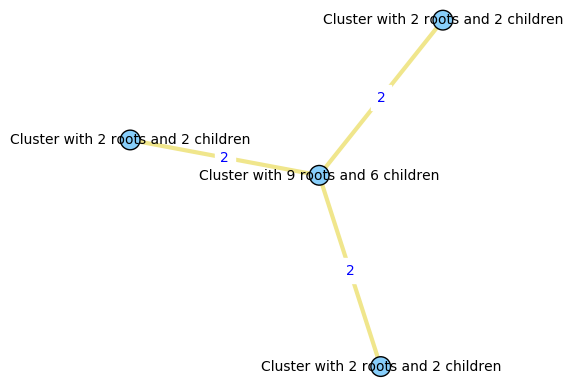

In [61]:
T = R.BY_tree()
plot(T, vertex_labels=True)

In [63]:
phi = R.roots()[0].parent().frobenius_endomorphism()
phi

Frobenius endomorphism on 11-adic Unramified Extension Field in b defined by x^3 + 2*x + 9 lifting b |--> b^11 on the residue field

In [73]:
def v(Y): # yellow vertex in closure of component containing Y
    verts_in_component = [Y[0], Y[1]] # TODO extend this
    for s in verts_in_component:
        if s in T.yellow_vertices():
            verbose("found yellow")
            return s
        if all(t not in verts_in_component for t in s.children()):
            verbose("found vert with no children in component")
            return s
v(T.yellow_edges()[0])

Cluster with 2 roots and 2 children

In [74]:
F = BYTreeIsomorphism(T, T, lambda C: C.frobenius(),
                      lambda Y: v(Y).star().epsilon(phi))
F(R)

Cluster with 9 roots and 6 children

In [75]:
F(T.blue_vertices()[1])

Cluster with 2 roots and 2 children

In [76]:
F(T.blue_vertices()[1]) == T.blue_vertices()[3]

True

In [77]:
F.epsilon(T.yellow_edges()[1])

NotImplementedError: extending using the sqrt function not yet implemented

So we are spinning the wheel.